# Denoising a Signal

In [1]:
import pandas as pd
import os, sys
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 18})
plt.style.use('seaborn-v0_8')


In [2]:
## Create a synthetic signal
dt = 0.001
t = np.arange(0, 1, dt)

# Composite signal of 50 Hz & 120 Hz
signal = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)

signal_clean = signal # copy for later comparison

# Introducing noise to the signal
signal = signal + 2.5 * np.random.randn(len(t))

minsignal, maxsignal = signal.min(), signal.max()


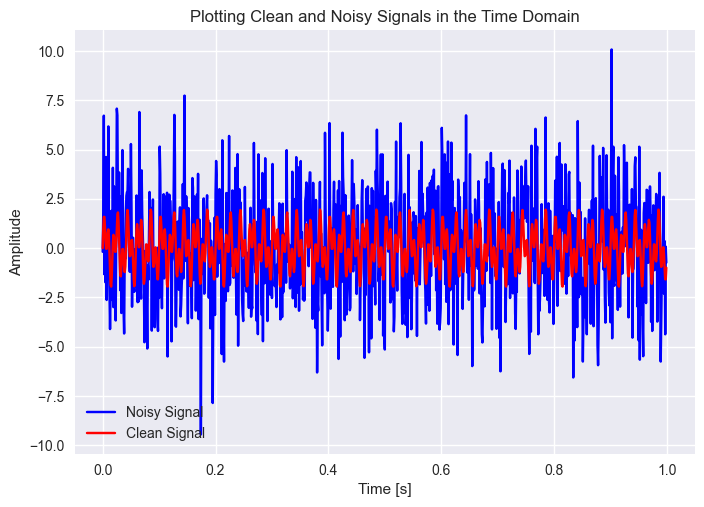

In [3]:
# Plotting the Noisy & Clean Signals

plt.plot(t, signal, 'b', t, signal_clean, 'r')
plt.title('Plotting Clean and Noisy Signals in the Time Domain')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(['Noisy Signal', 'Clean Signal'], loc='lower left')
plt.show()


In [4]:
# Fast Fourier Transform

n = len(t)
fhat = np.fft.fft(signal, n) # computes the fft

# multiplying the fast fourier transform with the conjugate to obtain 
# the power spectrum of the noisy signal
psd = fhat * np.conj(fhat)/n 

freq = (1/(dt*n)) * np.arange(n/2) # frequency array
idxs_half = np.arange(1, np.floor(n/2), dtype=np.int32)#first half index


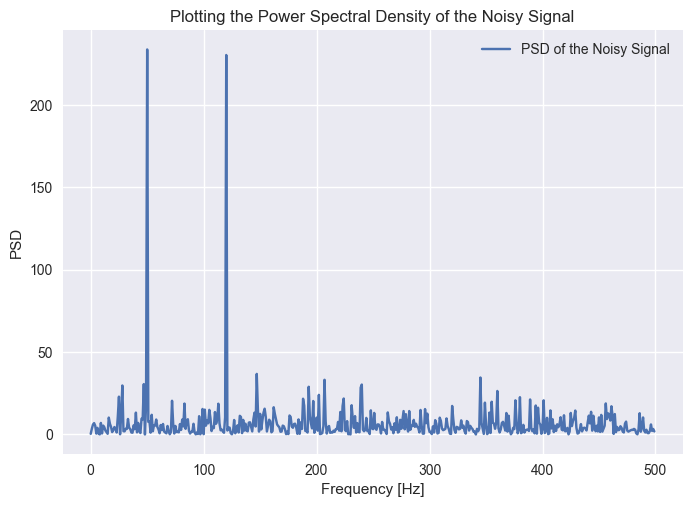

In [41]:
# Plotting the Power Spectral Density
plt.plot(freq, psd[0:len(psd)//2])
plt.title('Plotting the Power Spectral Density of the Noisy Signal')
plt.ylabel('PSD')
plt.xlabel('Frequency [Hz]')
plt.legend(['PSD of the Noisy Signal'])
plt.show()


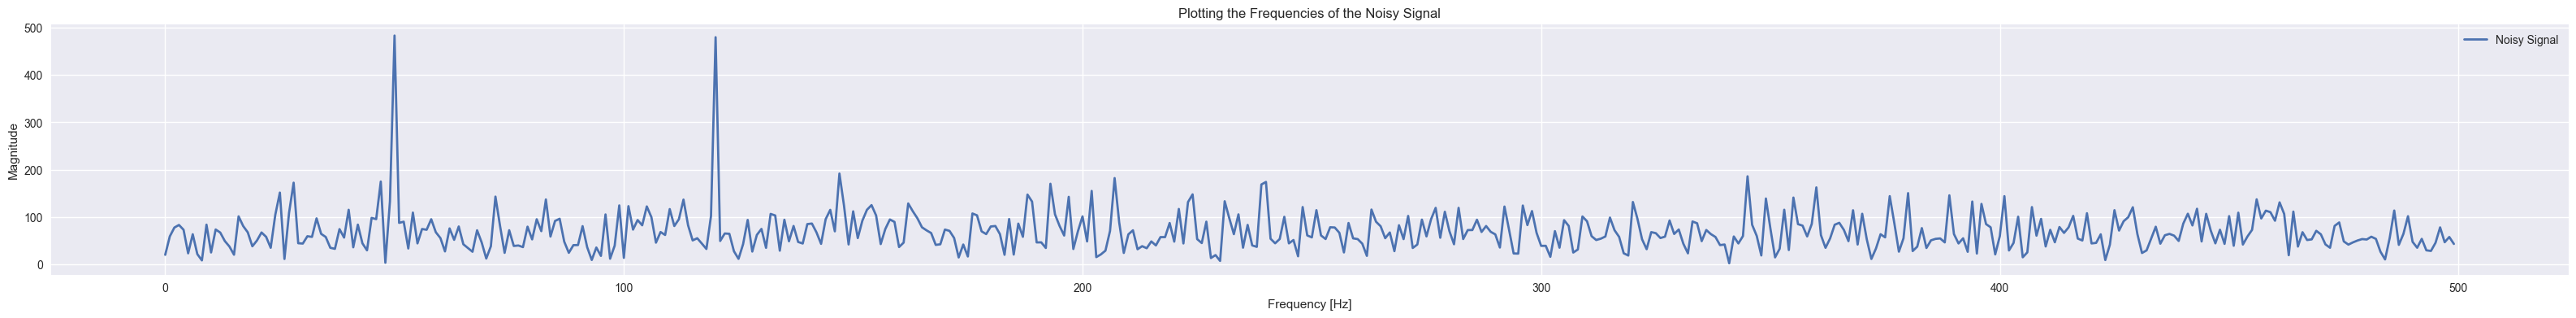

In [44]:
# Plotting the Power Spectral Density
plt.figure(figsize=(40,4))
plt.plot(freq, abs(fhat[0:len(fhat)//2]), label = 'Noisy Signal', linewidth=2)
plt.title('Plotting the Frequencies of the Noisy Signal')
plt.ylabel('Magnitude')
plt.xlabel('Frequency [Hz]')
plt.legend()
plt.show()


In [41]:
# Filter out the noise of the Noisy Signal
threshold = 100
psd_idxs = psd > threshold #array of False and True
psd_clean = psd * psd_idxs #zero out all the unnecessary powers
fhat_clean = psd_idxs * fhat # used to retrieve the signal

signal_filtered = np.fft.ifft(fhat_clean)


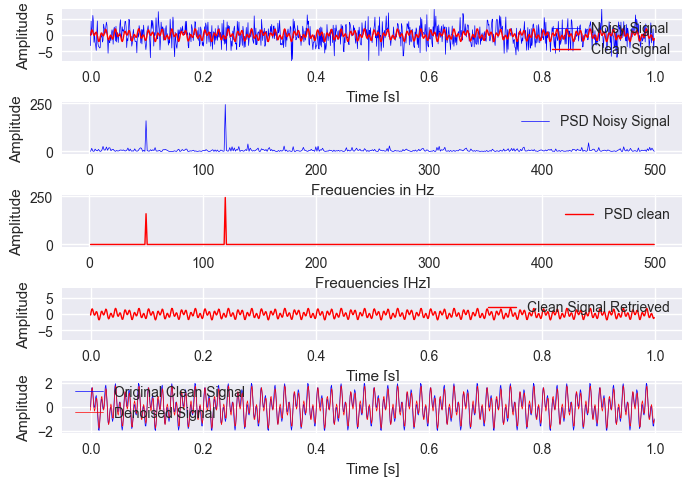

In [61]:
# Visualization of the Signals

fig, ax = plt.subplots(5,1)
ax[0].plot(t, signal, color='b', lw=0.5, label='Noisy Signal')
ax[0].plot(t, signal_clean, color='r', lw=1, label='Clean Signal')
ax[0].set_ylim([minsignal, maxsignal])
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Amplitude')
ax[0].legend()

ax[1].plot(freq[idxs_half], np.abs(psd[idxs_half]), color='b', lw=0.5, 
           label='PSD Noisy Signal')
ax[1].set_xlabel('Frequencies in Hz')
ax[1].set_ylabel('Amplitude')
ax[1].legend()

ax[2].plot(freq[idxs_half], np.abs(psd_clean[idxs_half]), color='r', 
           lw=1, label='PSD clean')
ax[2].set_xlabel('Frequencies [Hz]')
ax[2].set_ylabel('Amplitude')
ax[2].legend()

ax[3].plot(t, signal_filtered, color='r', lw=1, 
           label='Clean Signal Retrieved')
ax[3].set_ylim([minsignal, maxsignal])
ax[3].set_xlabel('Time [s]')
ax[3].set_ylabel('Amplitude')
ax[3].legend()

ax[4].plot(t, signal_clean, 'b', t, signal_filtered, 'r', lw=0.5)
ax[4].set_xlabel('Time [s]')
ax[4].set_ylabel('Amplitude')
ax[4].legend(['Original Clean Signal', 'Denoised Signal'], loc='lower left')


plt.subplots_adjust(hspace=0.4)
plt.savefig('signal-analysis.png', bbox_inches='tight', dpi=300)


In [68]:
# Clearly from the plot above, only most of the signal is denoised.

if signal_clean.all() == signal_filtered.all():
    print('Equal')
else:
    print('Not Equal')


Not Equal
